<a href="https://colab.research.google.com/github/alanabates/EDA-and-Predictive-Analytics-in-Python/blob/main/HW3_Bates_Alana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DESC 624 - Machine Learning Modeling**#

HW #3

#**I. Python Setup Section**

In [ ]:
#Python Packages
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sn
import numpy as np
from scipy import stats

In [ ]:
#Installing python datatable which is the same as data.table() in R
!pip install datatable
import datatable as dt

from datatable import (dt, f, by, ifelse, update, sort,
                       count, min, max, mean, sum, rowsum)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96.9 MB 110 kB/s 


In [ ]:
#Python h2o -  the Machine Learning package we will be using. It has both an R implementation and a Python implemenation. 


! pip install h2o

import h2o

#h2o.init()
#h2o.shutdown()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 57 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.3-py2.py3-none-any.whl size=177103819 sha256=cb886aeaef6b73570afdf27ac013b1b13b245db38264c46e9f8d24df206ad9ff
  Stored in directory: /root/.cache/pip/wheels/64/86/0f/d54be71f64b85d238edb037069bc866f2156cc563bf02be527
Successfully built h2o


#**II. Python Data Loading**

In [ ]:
cc_p = dt.fread("https://raw.githubusercontent.com/jjghockey/DESC624/main/UCI_Credit_Card.csv") 

cc_pd=cc_p.to_pandas()
cc_pd.rename(columns = {"default.payment.next.month": "defaultpaymentnextmonth"}, inplace=True)
cc_p=dt.Frame(cc_pd)

#cc_pd=cc_p.to_pandas() will copy all of the contents from cc_p into cc_pd (cc_pd will be in Pandas)
#cc_p=dt.Frame(cc_pd) will copy all of the content from cc_pd into cc_p (cc_p will be in datatable)
print(cc_p.head())
print(cc_pd.head())

   |    ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  PAY_3  PAY_4  …  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  defaultpaymentnextmonth
   | int32    float64  int32      int32     int32  int32  int32  int32  int32  int32      float64   float64   float64   float64                    bool8
-- + -----  ---------  -----  ---------  --------  -----  -----  -----  -----  -----     --------  --------  --------  --------  -----------------------
 0 |     1      20000      2          2         1     24      2      2     -1     -1  …         0         0         0         0                        1
 1 |     2     120000      2          2         2     26     -1      2      0      0  …      1000      1000         0      2000                        1
 2 |     3      90000      2          2         2     34      0      0      0      0  …      1000      1000      1000      5000                        0
 3 |     4      50000      2          2         1     37      0      0      0     

#**III. Python Data Exploration**

In [ ]:
#Data Exploration

In [ ]:
cc_p.names

('ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'defaultpaymentnextmonth')

In [ ]:
cc_p['count']=1
cc_p[:, sum(f.count)]

,count
,▪▪▪▪▪▪▪▪
0,30000


#**IV. Python Data Processing**

In [ ]:
# Features to recode continous values as categorical variables 
# Feature 1
cc_p[f.SEX==1, 'SX']="male"
cc_p[f.SEX==2, 'SX']="female"
print(cc_p[:, sum(f.count), by('SX')])

# Feature 2
cc_p[f.EDUCATION==1, 'EDUC']="Grad School"
cc_p[f.EDUCATION==2, 'EDUC']="University"
cc_p[f.EDUCATION==3, 'EDUC']="High School"
cc_p[f.EDUCATION>=4, 'EDUC']="Other"
cc_p[f.EDUCATION==0, 'EDUC']="Other"
print(cc_p[:, sum(f.count), by('EDUC')])

# Feature 3
cc_p[f.MARRIAGE==1, 'MAR']="Married"
cc_p[f.MARRIAGE==2, 'MAR']="Single"
cc_p[f.MARRIAGE==3, 'MAR']="Other"
cc_p[f.MARRIAGE==0, 'MAR']="Other"
print(cc_p[:, sum(f.count), by('MAR')])

# Feature 4 
cc_p[f.defaultpaymentnextmonth==1, 'DEF']="Yes"
cc_p[f.defaultpaymentnextmonth==0, 'DEF']="No"
print(cc_p[:, sum(f.count), by('DEF')])

   | SX      count
   | str32   int64
-- + ------  -----
 0 | female  18112
 1 | male    11888
[2 rows x 2 columns]

   | EDUC         count
   | str32        int64
-- + -----------  -----
 0 | Grad School  10585
 1 | High School   4917
 2 | Other          468
 3 | University   14030
[4 rows x 2 columns]

   | MAR      count
   | str32    int64
-- + -------  -----
 0 | Married  13659
 1 | Other      377
 2 | Single   15964
[3 rows x 2 columns]

   | DEF    count
   | str32  int64
-- + -----  -----
 0 | No     23364
 1 | Yes     6636
[2 rows x 2 columns]



In [ ]:
# Filtering the data with additional features


In [ ]:
cc_p[:, 'avg_payment_amount']=cc_p[:,(f.PAY_AMT1+f.PAY_AMT2+f.PAY_AMT3+f.PAY_AMT4+f.PAY_AMT5+f.PAY_AMT6)/6]
cc_p[:, 'avg_bill_amount']=cc_p[:,(f.BILL_AMT1+f.BILL_AMT2+f.BILL_AMT3+f.BILL_AMT4+f.BILL_AMT5+f.BILL_AMT6)/6]
cc_p[:, 'total_spent']=cc_p[:, f.BILL_AMT1+f.BILL_AMT2+f.BILL_AMT3+f.BILL_AMT4+f.BILL_AMT5+f.BILL_AMT6]

cc_pd=cc_p.to_pandas()   #Convert to PANDAS from Datatable
cc_pd['throughput']=0
cc_pd['throughput']=cc_pd['PAY_AMT1'].abs()+cc_pd['PAY_AMT2'].abs()+cc_pd['PAY_AMT3'].abs()+cc_pd['PAY_AMT4'].abs()+cc_pd['PAY_AMT5'].abs()+cc_pd['PAY_AMT6'].abs()+cc_pd['BILL_AMT1'].abs()+cc_pd['BILL_AMT2'].abs()+cc_pd['BILL_AMT3'].abs()+cc_pd['BILL_AMT4'].abs()+cc_pd['BILL_AMT5'].abs()+cc_pd['BILL_AMT6'].abs()
cc_p=cc_pd=dt.Frame(cc_pd) #Convert back from PANDAS to Datatable

cc_p[:, 'bill_ratio']=cc_p[:, f.total_spent/f.LIMIT_BAL]


cc_p[(f.LIMIT_BAL<=10000), 'BAL']='<=10000'
cc_p[(f.LIMIT_BAL>10000) & (f.LIMIT_BAL<=100000), 'BAL']='010001 to 100000'
cc_p[(f.LIMIT_BAL>100000) & (f.LIMIT_BAL<=200000), 'BAL']='100001 to 200000'
cc_p[(f.LIMIT_BAL>200000) & (f.LIMIT_BAL<=300000), 'BAL']='200001 to 300000'
cc_p[(f.LIMIT_BAL>300000) & (f.LIMIT_BAL<=400000), 'BAL']='300001 to 400000'
cc_p[(f.LIMIT_BAL>400000) & (f.LIMIT_BAL<=500000), 'BAL']='400001 to 500000'
cc_p[(f.LIMIT_BAL>500000) & (f.LIMIT_BAL<=600000), 'BAL']='500001 to 600000'
cc_p[(f.LIMIT_BAL>600000) & (f.LIMIT_BAL<=700000), 'BAL']='600001 to 700000'
cc_p[(f.LIMIT_BAL>700000) & (f.LIMIT_BAL<=800000), 'BAL']='700001 to 800000'
cc_p[(f.LIMIT_BAL>800000) & (f.LIMIT_BAL<=900000), 'BAL']='800001 to 900000'
cc_p[(f.LIMIT_BAL>900000) & (f.LIMIT_BAL<=10000000), 'BAL']='900001 to 1000000'
cc_p[(f.LIMIT_BAL>1000000), 'BAL']='1000001+'

cc_p[(f.throughput<=10000), 'TP']='<=10000'
cc_p[(f.throughput>10000) & (f.throughput<=100000), 'TP']='010001 to 100000'
cc_p[(f.throughput>100000) & (f.throughput<=200000), 'TP']='100001 to 200000'
cc_p[(f.throughput>200000) & (f.throughput<=300000), 'TP']='200001 to 300000'
cc_p[(f.throughput>300000) & (f.throughput<=400000), 'TP']='300001 to 400000'
cc_p[(f.throughput>400000) & (f.throughput<=500000), 'TP']='400001 to 500000'
cc_p[(f.throughput>500000) & (f.throughput<=600000), 'TP']='500001 to 600000'
cc_p[(f.throughput>600000) & (f.throughput<=700000), 'TP']='600001 to 700000'
cc_p[(f.throughput>700000) & (f.throughput<=800000), 'TP']='700001 to 800000'
cc_p[(f.throughput>800000) & (f.throughput<=900000), 'TP']='800001 to 900000'
cc_p[(f.throughput>900000) & (f.throughput<=1000000), 'TP']='900001 to 1000000'
cc_p[(f.throughput>1000000), 'TP']='1000001+'


#cc_p=dt.Frame(cc_pd)

In [ ]:
# Building additional features



In [ ]:
# Feature 1 - Age Ranges
cc_p[f.AGE < 18, 'age_cat'] = 'Under 18'
cc_p[(f.AGE >= 18) & (f.AGE <= 24), 'age_cat'] = '18-24'
cc_p[(f.AGE >= 25) & (f.AGE <= 34), 'age_cat'] = '25 to 34'
cc_p[(f.AGE >= 35) & (f.AGE <= 49), 'age_cat'] = '35 to 49'
cc_p[(f.AGE >= 50) & (f.AGE <= 59), 'age_cat'] = '50 to 59'
cc_p[(f.AGE >= 60) & (f.AGE <= 69), 'age_cat'] = '60 to 69'
cc_p[(f.AGE >= 70) & (f.AGE <= 79), 'age_cat'] = '70 to 79'
cc_p[f.AGE >= 80, 'age_cat'] = '80+'
cc_p[:, sum(f.count), by('age_cat') ]

,age_cat,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,18-24,2685
1,25 to 34,13011
2,35 to 49,11624
3,50 to 59,2341
4,60 to 69,314
5,70 to 79,25


In [ ]:
# Feature 2 - Total sum of all bill amounts
cc_p[:, 'bills_sum']=cc_p[:,(f.BILL_AMT1+f.BILL_AMT2+f.BILL_AMT3+f.BILL_AMT4+f.BILL_AMT5+f.BILL_AMT6)]
print(cc_p[:, sum(f.count), by('bills_sum')])

      |         bills_sum  count
      |           float64  int64
----- + -----------------  -----
    0 | -336259                1
    1 | -259523                1
    2 | -125480                1
    3 |  -79530                1
    4 |  -69777                1
    5 |  -65382                1
    6 |  -62825                1
    7 |  -53204                1
    8 |  -50953                1
    9 |  -47365                1
   10 |  -44264                1
   11 |  -42487                1
   12 |  -39409                1
   13 |  -38960                1
   14 |  -38807                1
    … |                 …      …
27365 |       3.29313e+06      1
27366 |       3.39892e+06      1
27367 |       3.46551e+06      1
27368 |       3.55459e+06      1
27369 |       5.26388e+06      1
[27370 rows x 2 columns]



In [ ]:
# Feature 3 - Repayment status by month
cc_p[f.PAY_0 == -1, 'sep_repayment_status'] = 'Paid Duly'
cc_p[f.PAY_0 != -1 , 'sep_repayment_status'] = 'Late' 
cc_p[f.PAY_2 == -1, 'aug_repayment_status'] = 'Paid Duly'
cc_p[f.PAY_2 != -1, 'aug_repayment_status'] = 'Late'
cc_p[f.PAY_3 == -1, 'jul_repayment_status'] = 'Paid Duly'
cc_p[f.PAY_3 != -1, 'jul_repayment_status'] = 'Late'
cc_p[f.PAY_4 == -1, 'jun_repayment_status'] = 'Paid Duly'
cc_p[f.PAY_4 != -1, 'jun_repayment_status'] = 'Late'
cc_p[f.PAY_5 == -1, 'may_repayment_status'] = 'Paid Duly'
cc_p[f.PAY_5 != -1, 'may_repayment_status'] = 'Late'
cc_p[f.PAY_6 == -1, 'apr_repayment_status'] = 'Paid Duly'
cc_p[f.PAY_6 != -1, 'apr_repayment_status'] = 'Late'

print(cc_p[:, sum(f.count), by('sep_repayment_status')])
print(cc_p[:, sum(f.count), by('aug_repayment_status')])
print(cc_p[:, sum(f.count), by('jul_repayment_status')])
print(cc_p[:, sum(f.count), by('jun_repayment_status')])
print(cc_p[:, sum(f.count), by('may_repayment_status')])
print(cc_p[:, sum(f.count), by('apr_repayment_status')])

   | sep_repayment_status  count
   | str32                 int64
-- + --------------------  -----
 0 | Late                  24314
 1 | Paid Duly              5686
[2 rows x 2 columns]

   | aug_repayment_status  count
   | str32                 int64
-- + --------------------  -----
 0 | Late                  23950
 1 | Paid Duly              6050
[2 rows x 2 columns]

   | jul_repayment_status  count
   | str32                 int64
-- + --------------------  -----
 0 | Late                  24062
 1 | Paid Duly              5938
[2 rows x 2 columns]

   | jun_repayment_status  count
   | str32                 int64
-- + --------------------  -----
 0 | Late                  24313
 1 | Paid Duly              5687
[2 rows x 2 columns]

   | may_repayment_status  count
   | str32                 int64
-- + --------------------  -----
 0 | Late                  24461
 1 | Paid Duly              5539
[2 rows x 2 columns]

   | apr_repayment_status  count
   | str32                 int64

In [ ]:
# Feature 4 - Zero Missed Payments 
cc_p[f.sep_repayment_status == 'Paid Duly', 'zero_missed_paymentss'] = 'True'
cc_p[f.sep_repayment_status == 'Late', 'zero_missed_paymentss'] = 'False'
cc_p[f.aug_repayment_status == 'Paid Duly', 'zero_missed_paymentss'] = 'True'
cc_p[f.aug_repayment_status == 'Late', 'zero_missed_paymentss'] = 'False'
cc_p[f.jul_repayment_status == 'Paid Duly', 'zero_missed_paymentss'] = 'True'
cc_p[f.jul_repayment_status == 'Late', 'zero_missed_paymentss'] = 'False'
cc_p[f.jun_repayment_status == 'Paid Duly', 'zero_missed_paymentss'] = 'True'
cc_p[f.jun_repayment_status == 'Late', 'zero_missed_paymentss'] = 'False'
cc_p[f.may_repayment_status == 'Paid Duly', 'zero_missed_paymentss'] = 'True'
cc_p[f.may_repayment_status == 'Late', 'zero_missed_paymentss'] = 'False'
cc_p[f.apr_repayment_status == 'Paid Duly', 'zero_missed_paymentss'] = 'True'
cc_p[f.apr_repayment_status == 'Late', 'zero_missed_paymentss'] = 'False'
print(cc_p[:, sum(f.count), by('zero_missed_paymentss')])

   | zero_missed_paymentss  count
   | str32                  int64
-- + ---------------------  -----
 0 | False                  24260
 1 | True                    5740
[2 rows x 2 columns]



In [ ]:
# Feature 5 - Total paid and average amount paid 
cc_p[:, 'total_paid']=cc_p[:, (f.PAY_AMT1+f.PAY_AMT2+f.PAY_AMT3+f.PAY_AMT4+f.PAY_AMT5+f.PAY_AMT6)]
print(cc_p[:, sum(f.count), by('total_paid')])

cc_p[:, 'avg_paid']=cc_p[:, (f.PAY_0+f.PAY_2+f.PAY_3+f.PAY_4+f.PAY_5+f.PAY_6)/6]
print(cc_p[:, sum(f.count), by('avg_paid')])


      |   total_paid  count
      |      float64  int64
----- + ------------  -----
    0 |  0             1432
    1 |  3                1
    2 |  4                2
    3 |  5                1
    4 | 13                1
    5 | 14                1
    6 | 15                1
    7 | 16                1
    8 | 18                3
    9 | 20                1
   10 | 22                1
   11 | 27                1
   12 | 38                1
   13 | 39                1
   14 | 48                1
    … |            …      …
19175 |  1.16531e+06      1
19176 |  1.41533e+06      1
19177 |  1.89632e+06      1
19178 |  2.31415e+06      1
19179 |  3.76407e+06      1
[19180 rows x 2 columns]

   |  avg_paid  count
   |   float64  int64
-- + ---------  -----
 0 | -2          2109
 1 | -1.83333      88
 2 | -1.66667     293
 3 | -1.5         867
 4 | -1.33333     489
 5 | -1.16667     626
 6 | -1          2496
 7 | -0.833333   1061
 8 | -0.666667   1163
 9 | -0.5        1061
10 | -0.333333  

In [ ]:
# Feature 6 - Current Balance
cc_p[:, 'current_balance']=cc_p[:,f.PAY_AMT1+f.PAY_AMT2+f.PAY_AMT2+f.PAY_AMT3+f.PAY_AMT4+f.PAY_AMT5+f.PAY_AMT6-(f.BILL_AMT1+f.BILL_AMT2+f.BILL_AMT3+f.BILL_AMT4+f.BILL_AMT5+f.BILL_AMT6)]
print(cc_p[:, sum(f.count), by('current_balance')])

      |  current_balance  count
      |          float64  int64
----- + ----------------  -----
    0 |     -4.06536e+06      1
    1 |     -3.43106e+06      1
    2 |     -3.30964e+06      1
    3 |     -3.24942e+06      1
    4 |     -3.15499e+06      1
    5 |     -3.14626e+06      1
    6 |     -3.0247e+06       1
    7 |     -3.01749e+06      1
    8 |     -2.9708e+06       1
    9 |     -2.8684e+06       1
   10 |     -2.86834e+06      1
   11 |     -2.85115e+06      1
   12 |     -2.84936e+06      1
   13 |     -2.83423e+06      1
   14 |     -2.8109e+06       1
    … |                …      …
26635 | 708960                1
26636 |      1.1614e+06       1
26637 |      1.61342e+06      1
26638 |      1.7562e+06       1
26639 |      3.88698e+06      1
[26640 rows x 2 columns]



In [ ]:
# Feature 7 - The number of timely payments and the average number of timely paymemnts
cc_p[:, 'flg1']=0
cc_p[:, 'flg2']=0
cc_p[:, 'flg3']=0
cc_p[:, 'flg4']=0
cc_p[:, 'flg5']=0
cc_p[:, 'flg6']=0

cc_p[f.PAY_0<0, 'flg1']=1
cc_p[f.PAY_2<0, 'flg2']=1
cc_p[f.PAY_3<0, 'flg3']=1
cc_p[f.PAY_4<0, 'flg4']=1
cc_p[f.PAY_5<0, 'flg5']=1
cc_p[f.PAY_6<0, 'flg6']=1

cc_p[:, 'num_timely_payments']=cc_p[:,f.flg1+f.flg2+f.flg3+f.flg4+f.flg5+f.flg6]
cc_p[:, 'avg_timely_payments']=cc_p[:,(f.flg1+f.flg2+f.flg3+f.flg4+f.flg5+f.flg6)/6]
print(cc_p[:, sum(f.count), by('avg_timely_payments')])

cc_p[f.avg_timely_payments<=0, 'avg_timely_pay_cat']="Timely"
cc_p[f.avg_timely_payments>0, 'avg_timely_pay_cat']="Not Timely"
print(cc_p[:, sum(f.count), by('avg_timely_pay_cat')])

   | avg_timely_payments  count
   |             float64  int64
-- + -------------------  -----
 0 |            0         16111
 1 |            0.166667   1811
 2 |            0.333333   1342
 3 |            0.5        1341
 4 |            0.666667   1633
 5 |            0.833333   2567
 6 |            1          5195
[7 rows x 2 columns]

   | avg_timely_pay_cat  count
   | str32               int64
-- + ------------------  -----
 0 | Not Timely          13889
 1 | Timely              16111
[2 rows x 2 columns]



In [ ]:
# Natural Log Features

In [ ]:
cc_pd=cc_p.to_pandas()
cc_pd['ln_LIMIT_BAL']=0
cc_pd['ln_LIMIT_BAL']=np.log(cc_pd['LIMIT_BAL']+1)
cc_p=cc_pd=dt.Frame(cc_pd)

In [ ]:
cc_pd=cc_p.to_pandas()
cc_pd['ln_avg_payment_amount']=0
cc_pd['ln_avg_payment_amount']=np.log(cc_pd['avg_payment_amount']+1)
cc_p=cc_pd=dt.Frame(cc_pd)

In [ ]:
cc_pd=cc_p.to_pandas()
cc_pd['ln_avg_bill_amount']=0
cc_pd['ln_avg_bill_amount']=np.log(cc_pd['avg_bill_amount']+1)
cc_p=cc_pd=dt.Frame(cc_pd)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
cc_pd=cc_p.to_pandas()
cc_pd['bill_pay']=np.log((cc_pd['avg_bill_amount'])*(cc_pd['avg_payment_amount'])+1)
cc_p=cc_pd=dt.Frame(cc_pd)


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
cc_pd=cc_p.to_pandas()
cc_pd['LN_TP']=0
cc_pd['LN_TP']=np.log(cc_pd['throughput']+1)
cc_p=cc_pd=dt.Frame(cc_pd)

In [ ]:
cc_p.names

('ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'defaultpaymentnextmonth',
 'count',
 'SX',
 'EDUC',
 'MAR',
 'DEF',
 'avg_payment_amount',
 'avg_bill_amount',
 'total_spent',
 'throughput',
 'bill_ratio',
 'BAL',
 'TP',
 'age_cat',
 'bills_sum',
 'sep_repayment_status',
 'aug_repayment_status',
 'jul_repayment_status',
 'jun_repayment_status',
 'may_repayment_status',
 'apr_repayment_status',
 'zero_missed_paymentss',
 'total_paid',
 'avg_paid',
 'current_balance',
 'flg1',
 'flg2',
 'flg3',
 'flg4',
 'flg5',
 'flg6',
 'num_timely_payments',
 'avg_timely_payments',
 'avg_timely_pay_cat',
 'ln_LIMIT_BAL',
 'ln_avg_payment_amount',
 'ln_avg_bill_amount',
 'bill_pay',
 'LN_TP')

In [ ]:
cc_pd=cc_p.to_pandas()
summary = cc_pd.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,1.500050e+04,8660.398374,1.000000e+00,7500.750000,15000.500000,22500.250000,3.000000e+04
LIMIT_BAL,30000.0,1.674843e+05,129747.661567,1.000000e+04,50000.000000,140000.000000,240000.000000,1.000000e+06
SEX,30000.0,1.603733e+00,0.489129,1.000000e+00,1.000000,2.000000,2.000000,2.000000e+00
EDUCATION,30000.0,1.853133e+00,0.790349,0.000000e+00,1.000000,2.000000,2.000000,6.000000e+00
MARRIAGE,30000.0,1.551867e+00,0.521970,0.000000e+00,1.000000,2.000000,2.000000,3.000000e+00
AGE,30000.0,3.548550e+01,9.217904,2.100000e+01,28.000000,34.000000,41.000000,7.900000e+01
PAY_0,30000.0,-1.670000e-02,1.123802,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_2,30000.0,-1.337667e-01,1.197186,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_3,30000.0,-1.662000e-01,1.196868,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_4,30000.0,-2.206667e-01,1.169139,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00


DEF             No       Yes
age_cat                     
18-24     0.728119  0.271881
25 to 34  0.797018  0.202982
35 to 49  0.777443  0.222557
50 to 59  0.751388  0.248612
60 to 69  0.716561  0.283439
70 to 79  0.720000  0.280000


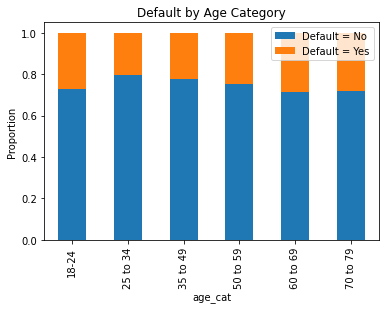

In [ ]:
cc_pd=cc_p.to_pandas()
crosstab_01 = pd.crosstab(cc_pd['age_cat'], cc_pd['DEF'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)

plt.legend(['Default = No', 'Default = Yes'])
plt.title('Default by Age Category')
plt.xlabel('age_cat'); plt.ylabel('Proportion'); plt.show()

DEF                          No       Yes
zero_missed_paymentss                    
False                  0.766653  0.233347
True                   0.830139  0.169861


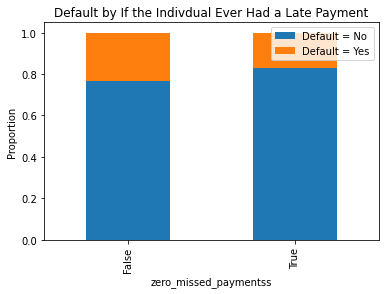

In [ ]:
cc_pd=cc_p.to_pandas()
crosstab_01 = pd.crosstab(cc_pd['zero_missed_paymentss'], cc_pd['DEF'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)

plt.legend(['Default = No', 'Default = Yes'])
plt.title('Default by If the Indivdual Ever Had a Late Payment')
plt.xlabel('zero_missed_paymentss'); plt.ylabel('Proportion'); plt.show()

DEF                       No       Yes
avg_timely_pay_cat                    
Not Timely          0.821657  0.178343
Timely              0.741853  0.258147


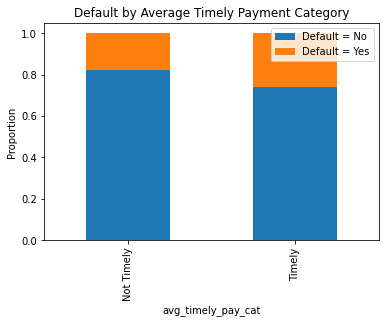

In [ ]:
cc_pd=cc_p.to_pandas()
crosstab_01 = pd.crosstab(cc_pd['avg_timely_pay_cat'], cc_pd['DEF'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)

plt.legend(['Default = No', 'Default = Yes'])
plt.title('Default by Average Timely Payment Category')
plt.xlabel('avg_timely_pay_cat'); plt.ylabel('Proportion'); plt.show()

DEF            No       Yes
MAR                        
Married  0.765283  0.234717
Other    0.763926  0.236074
Single   0.790717  0.209283


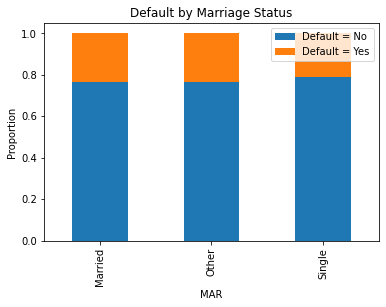

In [ ]:
cc_pd=cc_p.to_pandas()
crosstab_01 = pd.crosstab(cc_pd['MAR'], cc_pd['DEF'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)

plt.legend(['Default = No', 'Default = Yes'])
plt.title('Default by Marriage Status')
plt.xlabel('MAR'); plt.ylabel('Proportion'); plt.show()

DEF                No       Yes
EDUC                           
Grad School  0.807652  0.192348
High School  0.748424  0.251576
Other        0.929487  0.070513
University   0.762651  0.237349


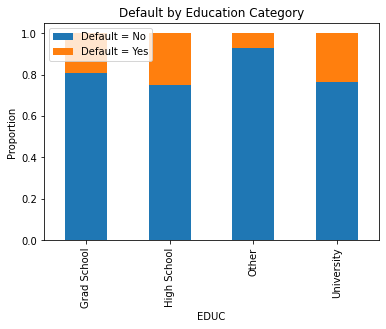

In [ ]:
cc_pd=cc_p.to_pandas()
crosstab_01 = pd.crosstab(cc_pd['EDUC'], cc_pd['DEF'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)

plt.legend(['Default = No', 'Default = Yes'])
plt.title('Default by Education Category')
plt.xlabel('EDUC'); plt.ylabel('Proportion'); plt.show()

DEF           No       Yes
SX                        
female  0.792237  0.207763
male    0.758328  0.241672


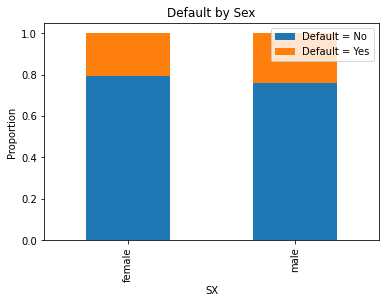

In [ ]:
cc_pd=cc_p.to_pandas()
crosstab_01 = pd.crosstab(cc_pd['SX'], cc_pd['DEF'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)

plt.legend(['Default = No', 'Default = Yes'])
plt.title('Default by Sex')
plt.xlabel('SX'); plt.ylabel('Proportion'); plt.show()

#**V. Python Data Analysis**

**Prepare Model**

1. You are to prepare 2 separate models and evaluations. There is only code for one below, so please copy and paste as appropriate. You should use the same X variables in both models.

2. Please select from any of the following model types:

  a. Random Forest

  b. Logistic Regression

  c. Naive Bayes

  d. Gradient Boosted Machines

  e. Neural Nets

**Answer:** I chose to prepare a logistic regression and gradient boosted machine model as shown in my code below.

3. Compare and Contrast your models' prediction (via AUC or other metric), your importance features.  Did the different models have different importance features.  Why do you think that is?

**Answer:** The code to prepare and evaluate my two models is below. Both of my models have a decent AUC with my logistic regression model having an AUC of 0.757 and my gradient boosted machine model having an AUC of 0.773. Thus, the better model in my opinion would be the gradient boosted machine from an accuracy standpoint. However, the gradient boosted machine only provides a slightly higher AUC and is a much more complex model than the logistic regression model. In regards to important features, the most important features for my logistic regression model are average paid, the number of timely payments, bill pay, and current balance. For my gradient boosted machine model, the most important feature is PAY_O by a lot. After PAY_O, other important features in my gradient boosted machine model are PAY_3, average paid, and PAY_2. 


In [ ]:
import h2o

h2o.init()
#h2o.shutdown()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgb6p_e1f
  JVM stdout: /tmp/tmpgb6p_e1f/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgb6p_e1f/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_j7nqyx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Preparing data for h2o
cc_pd = cc_p.to_pandas()  #Only use if you worked on cc_p instead of cc_pd. 
  
#Converting variables to factor variables for modeling
cc_pd['BAL'],_=pd.factorize(cc_pd['BAL'], sort=True)
cc_pd['avg_timely_payment'],_=pd.factorize(cc_pd['SX'], sort=True)
cc_pd['SX'],_=pd.factorize(cc_pd['SX'], sort=True)
cc_pd['EDUC'],_=pd.factorize(cc_pd['EDUC'], sort=True)
cc_pd['MAR'],_=pd.factorize(cc_pd['MAR'], sort=True)
cc_pd['age_cat'],_=pd.factorize(cc_pd['age_cat'], sort=True)
cc_pd['TP'],_=pd.factorize(cc_pd['TP'], sort=True)
cc_pd['bill_ratio'],_=pd.factorize(cc_pd['bill_ratio'], sort=True)
cc_pd['avg_payment_amount'],_=pd.factorize(cc_pd['avg_payment_amount'], sort=True)
cc_pd['avg_bill_amount'],_=pd.factorize(cc_pd['avg_bill_amount'], sort=True)
cc_pd['total_spent'],_=pd.factorize(cc_pd['total_spent'], sort=True)
cc_pd['total_paid'],_=pd.factorize(cc_pd['total_paid'], sort=True)
cc_pd['avg_paid'],_=pd.factorize(cc_pd['avg_paid'], sort=True)
cc_pd['bills_sum'],_=pd.factorize(cc_pd['bills_sum'], sort=True)
cc_pd['current_balance'],_=pd.factorize(cc_pd['current_balance'], sort=True)
cc_pd['sep_repayment_status'],_=pd.factorize(cc_pd['sep_repayment_status'], sort=True)
cc_pd['aug_repayment_status'],_=pd.factorize(cc_pd['aug_repayment_status'], sort=True)
cc_pd['jul_repayment_status'],_=pd.factorize(cc_pd['jul_repayment_status'], sort=True)
cc_pd['jun_repayment_status'],_=pd.factorize(cc_pd['jun_repayment_status'], sort=True)
cc_pd['may_repayment_status'],_=pd.factorize(cc_pd['may_repayment_status'], sort=True)
cc_pd['apr_repayment_status'],_=pd.factorize(cc_pd['apr_repayment_status'], sort=True)
cc_pd['zero_missed_paymentss'],_=pd.factorize(cc_pd['zero_missed_paymentss'], sort=True)
cc_pd['num_timely_payments'],_=pd.factorize(cc_pd['num_timely_payments'], sort=True)
cc_pd['avg_timely_pay_cat'],_=pd.factorize(cc_pd['avg_timely_pay_cat'], sort=True)
cc_pd['LN_TP'],_=pd.factorize(cc_pd['LN_TP'], sort=True)
cc_pd['ln_LIMIT_BAL'],_=pd.factorize(cc_pd['ln_LIMIT_BAL'], sort=True)
cc_pd['ln_avg_payment_amount'],_=pd.factorize(cc_pd['ln_avg_payment_amount'], sort=True)
cc_pd['ln_avg_bill_amount'],_=pd.factorize(cc_pd['ln_avg_bill_amount'], sort=True)
cc_pd['bill_pay'],_=pd.factorize(cc_pd['bill_pay'], sort=True)
cc_pd['PAY_0'],_=pd.factorize(cc_pd['PAY_0'], sort=True)
cc_pd['PAY_2'],_=pd.factorize(cc_pd['PAY_2'], sort=True)
cc_pd['PAY_3'],_=pd.factorize(cc_pd['PAY_3'], sort=True)
cc_pd['PAY_4'],_=pd.factorize(cc_pd['PAY_4'], sort=True)
cc_pd['PAY_5'],_=pd.factorize(cc_pd['PAY_5'], sort=True)
cc_pd['PAY_6'],_=pd.factorize(cc_pd['PAY_6'], sort=True)
cc_pd['BILL_AMT1'],_=pd.factorize(cc_pd['BILL_AMT1'], sort=True)
cc_pd['BILL_AMT2'],_=pd.factorize(cc_pd['BILL_AMT2'], sort=True)
cc_pd['BILL_AMT3'],_=pd.factorize(cc_pd['BILL_AMT3'], sort=True)
cc_pd['BILL_AMT4'],_=pd.factorize(cc_pd['BILL_AMT4'], sort=True)
cc_pd['BILL_AMT5'],_=pd.factorize(cc_pd['BILL_AMT5'], sort=True)
cc_pd['BILL_AMT6'],_=pd.factorize(cc_pd['BILL_AMT6'], sort=True)
cc_pd['PAY_AMT1'],_=pd.factorize(cc_pd['PAY_AMT1'], sort=True)
cc_pd['PAY_AMT2'],_=pd.factorize(cc_pd['PAY_AMT2'], sort=True)
cc_pd['PAY_AMT3'],_=pd.factorize(cc_pd['PAY_AMT3'], sort=True)
cc_pd['PAY_AMT4'],_=pd.factorize(cc_pd['PAY_AMT4'], sort=True)
cc_pd['PAY_AMT5'],_=pd.factorize(cc_pd['PAY_AMT5'], sort=True)
cc_pd['PAY_AMT6'],_=pd.factorize(cc_pd['PAY_AMT6'], sort=True)
cc_pd['DEF'],_=pd.factorize(cc_pd['DEF'], sort=True)
# Creating a dataframe with X% values of original dataframe
cc_pd_trn = cc_pd.sample(frac = 0.8)                        
  
# Creating dataframe with rest of the X% values
cc_pd_tst = cc_pd.drop(cc_pd_trn.index)

1. Explain your spliting method.  Why did you split your data this way? 
**Answer** The splitting method I chose is 80/20 (80% in the training set and 20% in the test set. One factor that should be considered when choosing a data splitting method is the size of the dataset. Small datasets mean you need to include more data in you training set to ensure you model can learn to make the predictions and a large dataset means you can include a bit more data in your test set for validation and assessment purposes. Since this dataset isn't small or larger but somewhere in between, I chose a 80/20 split to ensure my model has enough data to learn from and that that I can accurately assess my model's predictive performance. 

In [ ]:
trn=cc_pd_trn.loc[:,['DEF','SX','EDUC','MAR','avg_payment_amount','avg_timely_payment','avg_bill_amount','total_spent','bill_ratio','BAL','TP','age_cat','bills_sum','sep_repayment_status','aug_repayment_status','jul_repayment_status','jun_repayment_status','may_repayment_status','apr_repayment_status','zero_missed_paymentss','total_paid','avg_paid','current_balance','num_timely_payments','avg_timely_pay_cat','LN_TP','ln_LIMIT_BAL','ln_avg_payment_amount','ln_avg_bill_amount','bill_pay','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]  #Put your predictors here, separated by commas. Each predictor needs to be enclosed in single quotes
tst=cc_pd_tst.loc[:,['DEF','SX','EDUC','MAR','avg_payment_amount','avg_timely_payment','avg_bill_amount','total_spent','bill_ratio','BAL','TP','age_cat','bills_sum','sep_repayment_status','aug_repayment_status','jul_repayment_status','jun_repayment_status','may_repayment_status','apr_repayment_status','zero_missed_paymentss','total_paid','avg_paid','current_balance','num_timely_payments','avg_timely_pay_cat','LN_TP','ln_LIMIT_BAL','ln_avg_payment_amount','ln_avg_bill_amount','bill_pay','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]  #Put your predictors here, separated by commas. Each predictor needs to be enclosed in single quotes]]  #Put your predictors here, separated by commas. Each predictor needs to be enclosed in single quotes

In [ ]:
#Loading data into h2o
trn_h = h2o.H2OFrame(trn)
tst_h = h2o.H2OFrame(tst)

x = trn_h.columns
y = "DEF"
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
trn_h[y] = trn_h[y].asfactor()
tst_h[y] = tst_h[y].asfactor()

1. What tuning parameters did you pick to run and why?

2. Explain the three types of "grids?"
**Answer** A grid is a multi-dimensional matrix of inputs where each hyperparameter is an additional input to the model. The three types of grids are manual, complete, and randomized. A manual grid is when you tune your model by hand to find the best set of parameters. A complete grid is when you use a complete grid search where the machine looks at all possible parameters and model the intersection of all parameters on the grid. The third type of grid, a randomized grid, is when the machine assigns a random value to each parameter, runs the model, computes accuracy at each iteration, and selects the higest accuracy. 

3. What is the advantage of grid search?
**Answer** Grid search is the process for assessing possible parameters to find the best set of parameters for your model. Complete grid search looks at all possible parameters and the intersection of parameters are modeled. Grid search is advantageous because of simplicty and efficiency. Since there are many types of algorithms with each having countless combinations of parameters, it is much more simple end efficient to use grid search compared to tuning a model by hand.  

4. What is the disadvantage? 
**Answer** The disadvantage of complete grid search is that since it is modelling all of the possible parameters and the intersection of parameters, the process is extremely time-consuming. The disadvantage with randomized grid search is that you have a complete lack of control over which parameters are modelled which can lead to model instability where parameters conflict with one another. 

5. Why use Randomized Grid search?
**Answer** Using randomizing grid search is much more time efficient than complete grid search and is a more effortless approach to grid search. With randomized grid search, the process will likely lead to the set of tuning parameters that provides the average best prediction while saving you time and effort. 

In [ ]:
# Tuning Parameters for Logistic Regression
hyper_params_glm={
    'alpha':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10}                   

1. Explain what features you are using and why? 
**Answer:** I am using the features SX, EDUC, and MAR as they are the recoded categorical features for the SEX, EDUCATION, and MARRIAGE variables. By recoding them back into categorical form, I can better understand what the impact on the dependent variable is for each category of the features. I am also using average bill amount, total spent, bill ratio , BAL, TP, age category, bill sum, current balance, total paid, average paid, the number of timely payments, and average timely payment category as I believe they will provide valuable insights regarding what makes an indivdual likely to default. I also built and am using categorical features for the repayment status for each month as either "Paid Duly" or "Late" as well as a feature for if the person has ever been late on a payment ("True" or "False"). Lastly, I am using features that take the natural log of limit bal, average payment amount, average bill amount, and TP. I am using these features as limit bal, bill amount, and payment amount are highly skewed variables.  

2. Explain the new features you developed. 
**Answer:** The new features I developed include a categorical features for the repayment status for each month as either "Paid Duly" or "Late" as well as a  feature for if the person has ever been late on a payment ("True" or "False"). Additionally, I recoded the SEX, EDUCATION, and MARRIAGE back into categorical form as SX, EDUC, and MAR. I also built an age category feature as age ranges provide more meaningful information compared to various different age values that are not grouped together. Other features I built include a feature for the average bill amount, total spent, bill sum, current balance, total paid, and the average paid. 

3. Based on your EDA, why do you think they are important?
**Answer:** I believe that the age category feature is important as it groups together different ages into age ranges that make it easy to identify if certain age ranges are more likely to default or not rather than having various different age values that are not grouped together. Additionally, I believe that my feature zero_missed_paymentss, which has either a "True" or "False" value depending on if the indivdual had ever been late on a payment, is an important feature as it shows if someone who has not had a late repayment status for any of the months is less likely to default. I also built quite a few features that build upon the existing variables such as a bill sum feature that adds all of the bill amounts together and features that take the natural log of TP, Limit Bal, average payment amount, and average bill amount. 

In [ ]:
# Training
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

glm_grid1 = H2OGridSearch(model=H2OGeneralizedLinearEstimator,
                          grid_id='glm_grid1',
                          hyper_params=hyper_params_glm,
                          search_criteria=search_criteria
                         )
glm_grid1.train(x=x, y=y,
                training_frame=trn_h,
                stopping_metric = "AUC", stopping_tolerance = 1e-3, 
							  stopping_rounds = 3,
							  nfolds = 5, fold_assignment = "Modulo", 
                balance_classes = True,
							  keep_cross_validation_predictions = True,
                standardize = True,                   
                family = "binomial",
                lambda_search=False,
                seed=-1
               )
glm_gridperf1 = glm_grid1.get_grid(sort_by='auc', decreasing=True)

# Grabbing the top GLM model, chosen by validation error
best_glm1 = glm_gridperf1.models[0]

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.7/dist-packages/h2o/job.py:83: UserWarning: Reached maximum number of iterations 50!
  warnings.warn(w)
/usr/local/lib/python3.7/dist-packages/h2o/grid/grid_search.py:427: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch. This is due to the fact that the algo has to run initialization for every alpha value. Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message)


In [ ]:
#AUC
best_glm1 = glm_gridperf1.models[0]

best_glm_perf1 = best_glm1.model_performance(tst_h)
best_glm_perf1.auc()

0.7606723352033661

In [ ]:
#Confusion Matrix
best_glm_perf1


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.1365230735442295
RMSE: 0.36949028883616075
LogLoss: 0.4387174905431779
Null degrees of freedom: 5999
Residual degrees of freedom: 5954
Null deviance: 6243.223750786258
Residual deviance: 5264.609886518134
AIC: 5356.609886518134
AUC: 0.7606723352033661
AUCPR: 0.5164152142265239
Gini: 0.5213446704067322

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30167182450364344: 


,,0,1,Error,Rate
0,0,4110.0,602.0,0.1278,(602.0/4712.0)
1,1,614.0,674.0,0.4767,(614.0/1288.0)
2,Total,4724.0,1276.0,0.2027,(1216.0/6000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.301672,0.525741,195.0
1,max f2,0.136928,0.623350,305.0
2,max f0point5,0.443370,0.548309,135.0
3,max accuracy,0.482005,0.818667,119.0
4,max precision,0.660440,0.779528,68.0
5,max recall,0.021094,1.000000,395.0
6,max specificity,0.998438,0.999576,0.0
7,max absolute_mcc,0.332387,0.401977,182.0
8,max min_per_class_accuracy,0.185571,0.690994,263.0
9,max mean_per_class_accuracy,0.252580,0.702978,218.0



Gains/Lift Table: Avg response rate: 21.47 %, avg score: 22.04 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.851006,3.260870,3.260870,0.700000,0.933978,0.700000,0.933978,0.032609,0.032609,226.086957,226.086957,0.028789
1,2,0.02,0.772542,3.881988,3.571429,0.833333,0.806532,0.766667,0.870255,0.038820,0.071429,288.198758,257.142857,0.065486
2,3,0.03,0.721832,3.416149,3.519669,0.733333,0.748522,0.755556,0.829678,0.034161,0.105590,241.614907,251.966874,0.096252
3,4,0.04,0.676735,3.881988,3.610248,0.833333,0.702807,0.775000,0.797960,0.038820,0.144410,288.198758,261.024845,0.132950
4,5,0.05,0.624173,3.183230,3.524845,0.683333,0.648804,0.756667,0.768129,0.031832,0.176242,218.322981,252.484472,0.160750
5,6,0.10,0.473240,2.655280,3.090062,0.570000,0.542367,0.663333,0.655248,0.132764,0.309006,165.527950,209.006211,0.266137
6,7,0.15,0.395839,2.065217,2.748447,0.443333,0.431968,0.590000,0.580821,0.103261,0.412267,106.521739,174.844720,0.333956
7,8,0.20,0.319650,1.863354,2.527174,0.400000,0.358292,0.542500,0.525189,0.093168,0.505435,86.335404,152.717391,0.388924
8,9,0.30,0.221888,1.102484,2.052277,0.236667,0.262138,0.440556,0.437505,0.110248,0.615683,10.248447,105.227743,0.401974
9,10,0.40,0.181625,0.838509,1.748835,0.180000,0.200614,0.375417,0.378282,0.083851,0.699534,-16.149068,74.883540,0.381410


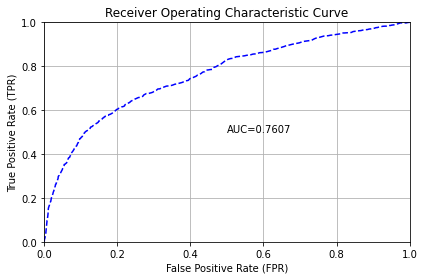

([0.00042444821731748726,
  0.0006366723259762309,
  0.0006366723259762309,
  0.0006366723259762309,
  0.0008488964346349745,
  0.0008488964346349745,
  0.0010611205432937182,
  0.0012733446519524619,
  0.0014855687606112054,
  0.001697792869269949,
  0.0019100169779286927,
  0.0025466893039049238,
  0.0025466893039049238,
  0.0025466893039049238,
  0.0025466893039049238,
  0.0027589134125636672,
  0.0027589134125636672,
  0.0029711375212224107,
  0.0029711375212224107,
  0.003395585738539898,
  0.0036078098471986416,
  0.0038200339558573855,
  0.0038200339558573855,
  0.004244482173174873,
  0.004456706281833617,
  0.004456706281833617,
  0.004881154499151104,
  0.004881154499151104,
  0.004881154499151104,
  0.0050933786078098476,
  0.0050933786078098476,
  0.005305602716468591,
  0.005305602716468591,
  0.005305602716468591,
  0.005305602716468591,
  0.0055178268251273345,
  0.005942275042444821,
  0.005942275042444821,
  0.005942275042444821,
  0.005942275042444821,
  0.00636672325

In [ ]:
#ROC
best_glm_perf1.plot(type='roc')

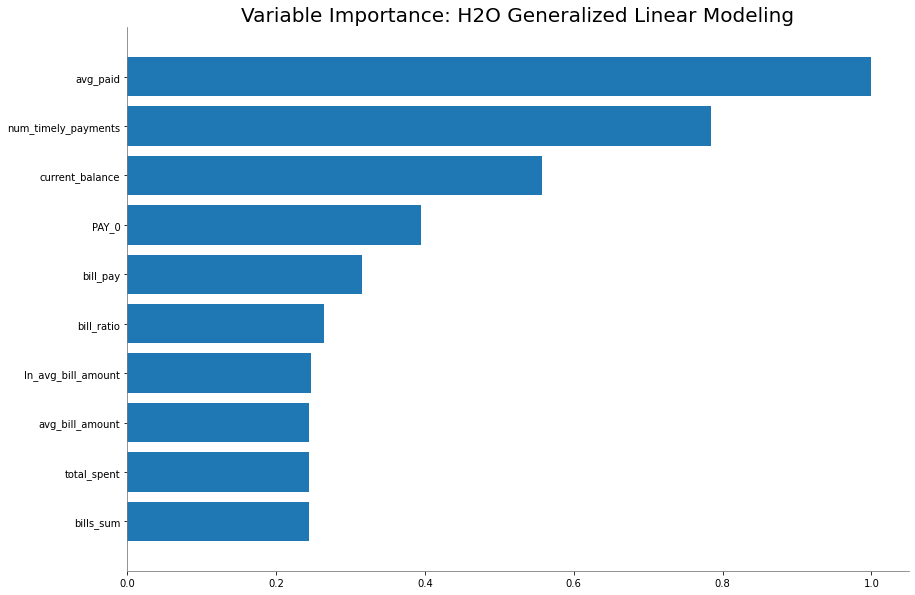

<Figure size 432x288 with 0 Axes>

In [ ]:
#Variable Importance
best_glm1.varimp_plot(num_of_features=10)

Model 2 

In [ ]:
# Tuning Parameters for Gradient Boosted Machine
hyper_params_gbm = {
    'ntrees': [50,100,150,200,500,1000,2000], 
	  'max_depth': [5, 10,15,20], 
	  'min_rows': [2, 5,10,15,20], 
	  'learn_rate': [.06,.07,.08,.09,.1,.11,.12],
	  'sample_rate': [.95, .975,.99,.995,1],
	  'col_sample_rate': [.3,.4,.5,.6,.7],
	  'col_sample_rate_per_tree': [.6,.7,.8,.9,1],
	  'nbins_cats': [32,64,128,256],
	  'learn_rate_annealing': [0.25,0.5,0.75, 1]	
}               

search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': -1,
                   'max_runtime_secs': 300
                   }  

In [ ]:
# Training Gradient Boosted Machine
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=hyper_params_gbm,
                          search_criteria=search_criteria
                         )
gbm_grid1.train(x=x, y=y,
                training_frame=trn_h,
                stopping_metric = "AUC", stopping_tolerance = 1e-3, 
							  stopping_rounds = 3,
							  nfolds = 5, fold_assignment = "Modulo", 
							  distribution = "AUTO",
                balance_classes = True,
							  keep_cross_validation_predictions = True,
                seed=-1
               )
# Get the grid results, sorted by validation error
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
best_gbm1 = gbm_gridperf1.models[0]

# AUC

best_gbm_perf1 = best_gbm1.model_performance(tst_h)
best_gbm_perf1.auc()

0.7644339580982611

In [ ]:
# Confusion Matrix
best_gbm_perf1


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.14977835247696974
RMSE: 0.38701208311494584
LogLoss: 0.46755118102253695
Mean Per-Class Error: 0.30722076052684305
AUC: 0.7644339580982611
AUCPR: 0.5297342864418271
Gini: 0.5288679161965222

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24014118140177804: 


,,0,1,Error,Rate
0,0,4063.0,649.0,0.1377,(649.0/4712.0)
1,1,614.0,674.0,0.4767,(614.0/1288.0)
2,Total,4677.0,1323.0,0.2105,(1263.0/6000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.240141,0.516277,160.0
1,max f2,0.164053,0.620693,308.0
2,max f0point5,0.321590,0.559322,68.0
3,max accuracy,0.321590,0.823500,68.0
4,max precision,0.388243,1.000000,0.0
5,max recall,0.128529,1.000000,391.0
6,max specificity,0.388243,1.000000,0.0
7,max absolute_mcc,0.275397,0.393395,117.0
8,max min_per_class_accuracy,0.199210,0.690153,232.0
9,max mean_per_class_accuracy,0.210350,0.696791,209.0



Gains/Lift Table: Avg response rate: 21.47 %, avg score: 20.28 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.369337,3.571429,3.571429,0.766667,0.373527,0.766667,0.373527,0.035714,0.035714,257.142857,257.142857,0.032743
1,2,0.02,0.363730,3.959627,3.765528,0.850000,0.367093,0.808333,0.370310,0.039596,0.075311,295.962733,276.552795,0.070429
2,3,0.03,0.358468,3.726708,3.752588,0.800000,0.361034,0.805556,0.367218,0.037267,0.112578,272.670807,275.258799,0.105150
3,4,0.04,0.354314,3.649068,3.726708,0.783333,0.356652,0.800000,0.364576,0.036491,0.149068,264.906832,272.670807,0.138882
4,5,0.05,0.350575,3.338509,3.649068,0.716667,0.352494,0.783333,0.362160,0.033385,0.182453,233.850932,264.906832,0.168659
5,6,0.10,0.314666,2.686335,3.167702,0.576667,0.334725,0.680000,0.348443,0.134317,0.316770,168.633540,216.770186,0.276023
6,7,0.15,0.275343,2.034161,2.789855,0.436667,0.295555,0.598889,0.330813,0.101708,0.418478,103.416149,178.985507,0.341865
7,8,0.20,0.247753,1.490683,2.465062,0.320000,0.260684,0.529167,0.313281,0.074534,0.493012,49.068323,146.506211,0.373106
8,9,0.30,0.215129,1.133540,2.021222,0.243333,0.229660,0.433889,0.285407,0.113354,0.606366,13.354037,102.122153,0.390110
9,10,0.40,0.197660,0.908385,1.743012,0.195000,0.206105,0.374167,0.265582,0.090839,0.697205,-9.161491,74.301242,0.378444


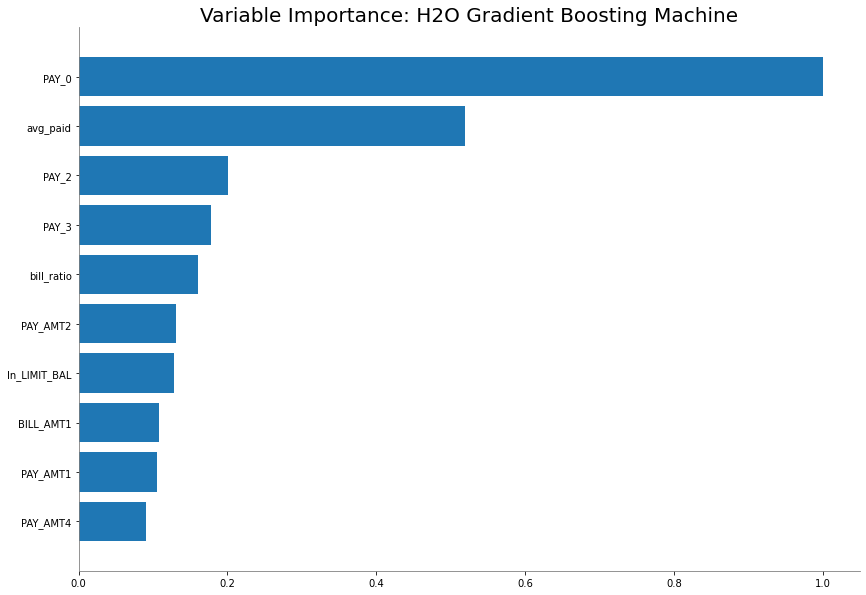

<Figure size 432x288 with 0 Axes>

In [ ]:
# Variable Importance
best_gbm1.varimp_plot(num_of_features=10)

In [ ]:

#h2o.shutdown()

1. Which features are NOT important in the model? Why do you think that is?

**Answer:** The features that are not important in the model turned out to be some of the features I built such as age category and the categorical feature for each month's repayment status where the value is either "Paid Duly" or "Late". I don't believe that these features are very important as they did not have a positive impact on my model's AUC scores. 

2. Were any of the features you developed important in either model? 

**Answer:** Yes, some of the features I developed were important. Average paid was important in both models as shown by each model's variable importance bar chart. Additionally, the number of timely payments and current balance were important in my logistic regression model. 

3. Why do you think they were (or where not)?

**Answer:** I think that these features that I built were important in my model because when I was adjusting the model in regards to which features to include, these feature's increased the AUC of my models when they were included. Additionally, all of these features were shown on the variable importance bar chart for either my logistic regression or gradient boosted machine model, or both. 

4. Calculate the overall Accuracy of your model? How does the Accuracy compare to a baseline accuracy? Is Accuracy a good measure of effectiveness of your model for this data, why or why not?

**Answer:** The overall accuracy of my model can be calculated using the confusion matrix for each model. For my logistic regression model, the overall accuracy is 77.4% and for my gradient boosted machine model, the overall accuracy is 77.8%. Accuracy is a great measure of effectiveness of my models for this data as it is calculated using the TP, TN, FP, and FN: (TP+TN)/(TP+TN+FP+FN). 

5. Do you think your model has a reliable prediction? Why or Why Not?

**Answer:** Yes, I believe that my models have a reliable prediction, especially my graident boosted machine model as it scored a slightly higher AUC and accuracy score. However, while both of my models have decent AUC and accuracy scores, the predictive accuracy performance of my models could be approved upon to ideally get an AUC above 0.80. 